In [1]:
import os

In [2]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
F1_score = 0.5
verififcation_threshold = 0.8

In [5]:
class L1Distance(tf.keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super().__init__()

    def call(self, encoded_input_image, encoded_validation_image):
        return tf.math.abs(encoded_input_image - encoded_validation_image)

In [6]:
def normalize(path):
    byte_image = tf.io.read_file(path)
    image = tf.io.decode_jpeg(byte_image)
    
    image = image / 255
    
    return image

In [7]:
current_path = os.path.abspath(os.getcwd())
image_path = os.path.join(current_path, "Validation")

In [8]:
dataset = tf.data.Dataset.list_files(image_path + r'\*.jpg')

In [9]:
path1 = dataset.as_numpy_iterator().next()

In [10]:
path1

b'c:\\Users\\thiya\\Desktop\\Face Recognition\\Validation\\9522cf29-60e2-11ec-878c-8a7b8eb03193.jpg'

In [11]:
validation_images = dataset.map(normalize)
validation_images = validation_images.batch(1)

In [34]:
image = cv2.imread(r"C:\Users\thiya\Desktop\Face Recognition\Profile Photo.jpg")
cv2.imwrite(r"C:\Users\thiya\Desktop\Face Recognition\Profile Photo.jpg", cv2.resize(image, (105, 105)))

True

In [35]:
input_image = normalize(r"C:\Users\thiya\Desktop\Face Recognition\Profile Photo.jpg")

In [36]:
input_image.shape

TensorShape([105, 105, 3])

In [31]:
validate_image = normalize(r"C:\Users\thiya\Desktop\Face Recognition\Negatives\Juanes_0001.jpg")

In [32]:
validate_image.shape

TensorShape([105, 105, 3])

In [18]:
model = tf.keras.models.load_model('face.h5',
                                    custom_objects = {'L1Distance': L1Distance})

In [37]:
model.predict(list(np.expand_dims([input_image, validate_image], axis = 1))) > 0.5

array([[ True]])

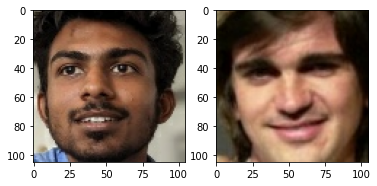

In [38]:
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.subplot(1, 2, 2)
plt.imshow(validate_image)

plt.show()